 <div style="clear: left;">
 <p style="float: left;"><img src="https://world.wng.org/sites/default/files/Beginnings%203-22.1.jpg" height="150" width="350" border="10"></p>
 </div>
 <center><p><H1>Welcome to EMSC Geophysics</H1></p>
 <p><H1>EMSC2022: Introduction to Global Geophysics</H1><p>
 <p><H1>Semester 1: Week 8 Practical</H1><p>
 <p><H2>Instructor: Dave Heslop (david.heslop@anu.edu.au)</H2><p>

<font color="red"><hr style="border:none;height:3px;background-color:black;width:950px;"></center>
<center><p><H1>The learning objectives for this practical are:</H1></p>
<center><p><H2>(1) Estimating the position of an Euler pole.</H2></p>
<center><p><H2>(2) Understanding how the properties of an Euler pole relate to relative plate motions.</H2></p>
<center><p><H2>(3) Processing data and creating models in Python.</H2></p></font> 
    <hr style="border:none;height:3px;background-color:black;width:950px;"></center>
<center><p><H1>Materials you'll require for this practical are:</H1></p>
<center><p><H2>(1) Pencil and paper for sketching ideas</H2></p>
<center><p><H2>(2) Laptop</H2></p>
<center><p><H2>(3) &#9749; &#x2795; &#129504;</H2></p> 

<hr style="border:none;height:3px;background-color:black;width:950px;"></center>

# Introduction
The philosophy of this practical is different to our previous sessions. Typically, we provide you a sequence of tasks to complete that lead you to a final answer and a demonstration of a given concept. In this practical we will take a "reseach-lead" approach, where you will conceive for yourself the scientific steps required to represent a plate tectonic process.   

Your challenge is to devise a technique to estimate the properties of an Euler pole that approximates the relative motion of the South America and Africa tectonic plates over the last 47 million years. 

Specifically, you should consider that the spreading rate at mid-ocean ridges is expected to vary as the sine of angle between the Euler pole and a given point on the ridge (we discussed this in the lectures).

The most important aspect of this practical exercise is for you to consider in detail how you can use the information available to estimate a pole position. Once you have developed a plan for estimating the Euler pole, then you can try to code it below. ***However, the key aim of this practical is for you to develop the concept and details of your estimation process, rather than your ability to code it in Python.***

### Observations: Magnetic anomaly 21 in the South Atlantic

The map below shows a locations of the mid-Atlantic ridge and magnetic anomaly 21 in the South Atlantic between South America and Africa. Red lines and points on the map indicate transect locations where the position of magnetic anomaly 21 and the ridge have been recorded within given transform faults. Each transect is marked with a different letter for identification.

 <p><img src="https://www.dropbox.com/s/2bcaavco6urt3d7/Practical%208%20-%20MAP%20A.jpg?raw=1" height="150" width="900" border="10"></p>
 
The positions (latitude and longitude) of the ridge and magnetic anomaly 21 on the western and eastern flanks are given in the table below for each transect.

 <p><img src="https://www.dropbox.com/s/955atmexyb7nx85/Anomaly%20position%20table.jpg?raw=1" height="150" width="900" border="10"></p>


# Your challenge
***(1) Working in groups or alone, devise a method to estimate the Euler pole that is most consistent with the seafloor spreading information provided in the table above.***

***(2) Write Python code in this Jupyter notebook to implement your method to estimate the Euler pole.*** The code below shows you how to enter the positional data. Once that is done, then you should implement your method.

<hr style="border:none;height:3px;background-color:black;">

## Entering the available positional information
We'll enter the data sequentially, first entering the positions along the mid-ocean ridge and then the positions of magnetic anomaly 21 on the western and eastern flanks of the ridge. We can enter the latitude and longitude of our positions along the ridge as NumPy arrays. Therefore, we start by importing the NumPy package, which we'll give the abbreviation ```np```.

In [1]:
import numpy as np

<hr style="border:none;height:1px;background-color:black;">

### Positions along the mid-ocean ridge
We'll use our standard nomenclature, where latitudes and longitudes are given the symbols $\lambda$ and $\phi$, respectively. 

For the positions along the ridge, we'll use the variable names:

```lambda_R``` = latitude on the ridge (i.e., $\lambda_R$) 

```phi_R``` = longitude on the ridge (i.e., $\phi_R$)

You can see the numbers entered into the functions correspond to the ridge latitudes and longitudes provided in the original data table.

In [2]:
lambda_R = np.array([-8.86,-12.03,-14.41,-17.95,-19.54,-20.58,-22.17,
                     -23.33,-24.86,-26.56,-29.56,-31.88,-32.73,-36.95,-40.12,-42.08])
phi_R = np.array([-12.40,-13.55,-12.47,-11.99,-10.84,-10.70,-12.60,
                  -12.33,-13.08,-11.99,-12.53,-13.55,-13.69,-16.33,-15.45,-15.11])

<hr style="border:none;height:1px;background-color:black;">

### Magnetic anomaly 21 positional data along the western flank
For the western flank magnetic anomaly positions, we'll use the variable names:

```lambda_W``` = latitude on the western flank (i.e., $\lambda_W$) 

```phi_W``` = longitude on the western flank (i.e., $\phi_W$)

In [3]:
lambda_W = np.array([-10.26,-13.25,-16.00,-19.05,-21.01,-22.17,-23.21,
                     -24.86,-26.20,-27.97,-30.90,-33.04,-34.69,-37.74,-41.16,-43.11])
phi_W = np.array([-21.83,-24.07,-23.05,-22.17,-21.09,-21.63,-22.51,
                  -23.46,-23.33,-22.65,-23.46,-25.50,-27.47,-28.62,-28.82,-29.91])

<hr style="border:none;height:1px;background-color:black;">

### Magnetic anomaly 21 positional data along the eastern flank
For the eastern flank magnetic anomaly positions, we'll use the variable names:

```lambda_E``` = latitude on the eastern flank (i.e., $\lambda_E$) 

```phi_E``` = longitude on the eastern flank (i.e., $\phi_E$)

In [4]:
lambda_E = np.array([-7.02,-10.63,-13.13,-15.82,-17.47,-18.69,-19.91,
                     -21.56,-22.90,-24.37,-27.18,-29.86,-31.51,-34.69,-37.92,-40.06])
phi_E = np.array([-3.98,-6.09,-3.85,-2.29,-1.06,-1.67,-2.62,-3.03,
                  -2.83,-1.61,-1.33,-2.49,-3.37,-4.73,-4.32,-4.52])

### We need to work in radians
NumPy assumes that all angles are in radians. Therefore, it is simplest to transform all of out latitudes and longitudes into radians at this stage. This is done using the NumPy ```deg2rad``` functions, which as the names suggests, converts values from degrees into radians.

In [5]:
lambda_R = np.deg2rad(lambda_R) #convert the ridge latitudes to radians
phi_R = np.deg2rad(phi_R) #convert the ridge longitudes to radians
lambda_W = np.deg2rad(lambda_W) #convert the western flank latitudes to radians
phi_W = np.deg2rad(phi_W) #convert the western flank longitudes to radians
lambda_E = np.deg2rad(lambda_E) #convert the eastern flank latitudes to radians
phi_E = np.deg2rad(phi_E) #convert the eastern flank latitudes to radians

We have now completed the input of our positional data and we have converted it into radians so that is is compatible with NumPy.

<font color="red"><hr style="border:none;height:3px;background-color:black;width:950px;"></center>
<center><p><H1>SOLUTION</H1></p></font> 

### The following solution uses a combination of exposition and Python code to illustrate the step-by-step process of estimating an Euler pole based on the provided observations.

<hr style="border:none;height:3px;background-color:black;">

## Task 1: Estimate the spreading rates along the ridge

We have defined the locations of magnetic anomaly 21 along the western and eastern flanks, but how can we estimate the spreading rate along the mid-ocean ridge. We can use the simple distance, speed, time formula:

### $\textrm{speed} = \frac{\textrm{distance}}{\textrm{time}}$

Therefore, if we can estimate the distance between corresponding anomalies on the western and eastern flanks and divide by the time elapsed since the material formed at the mid-ocean ridge, then we can find the speed (which is equivalent to the spreading rate). 

First the easy part, we know the elapsed time because the age of magnetic anomaly 21 is 47 Ma. However, how can estimate the distance between corresponding anomalies on the western and eastern flanks? 

To estimate the distance we'll employ a concept that we met in the Week 1 practical, specifically; great-circle angle (see Wikipedia for background information: https://en.wikipedia.org/wiki/Great-circle_distance ).

The angle $\theta$ between two locations ***A*** and ***B*** on a sphere is given by:

$\theta = \cos^{-1}[\sin \lambda_A \sin \lambda_B + \cos \lambda_A \cos \lambda_B \cos(\phi_B - \phi_A)]$

where $\lambda$ is the latitude and $\phi$ is the longitude.

Once we have found $\theta$ (in radians) we can determine the distance, $D$, between the points using the radius of the Earth, $R$:

### $ D = R \theta$

<hr style="border:none;height:1px;background-color:black;">

### Let's now estimate the speed using Python
First we'll define Earth's radius in centimeters: 

In [6]:
R = 6378E5 #Earth's radius in centimeters

Now we'll find the angle between the corresponding anomaly positions on the western and eastern flanks. These angles are in radians and we'll give them the variable name ```theta_WE```

In [7]:
theta_WE = np.arccos(np.sin(lambda_W)*np.sin(lambda_E)+np.cos(lambda_W)*np.cos(lambda_E)*np.cos(phi_E-phi_W))

Now convert the angles into distances, which we'll call ```D``` with units of centimeters (cm):

In [8]:
D = R*theta_WE #magnetic anomaly seperation (in centimeters)

Finally, we'll estimate the speed ```V``` in units of centimeters per year (cm yr$^{-1})$

In [9]:
V = D / 47E6 #magnetic anomaly seperation (in centimeters) divided by anomaly age (in years)

Now that we have estimated the observed spreading rate, we need to find an Euler pole that is consistent with those observations.

<hr style="border:none;height:3px;background-color:black;">

## Task 2: Predicting spreading rate from an Euler pole

As we discussed in the lectures, the equation for the relative velocity between two plates based on their shared Euler pole is given by:

### $v = \omega R \sin \theta$,

where $v$ is the velocity, $\omega$ is the rotational velocity, $R$ is Earth's radius and $\theta$ is the angle between the pole and the point of interest. 

Using a great-circle angle we can find the angle between the latitude and longitude of the Euler pole (denoted as $\lambda_P$ and $\psi_P$, respectively) and a point of interest on the mid-ocean ridge (denoted as $\lambda_R$ and $\psi_R$):

### $\theta = \cos^{-1}[\sin \lambda_P \sin \lambda_R + \cos \lambda_P \cos \lambda_R \cos(\phi_R - \phi_P)]$

Therefore if we define an Euler pole with parameters $\lambda_P$, $\psi_P$ and $\omega_P$ we can make predications of the spreading rate at different positions along the mid-ocean ridge. 

<hr style="border:none;height:1px;background-color:black;">

### Defining an Euler pole
Of course to make this calculation we need to define the Euler pole. As a first guess, let's use the modern Euler pole position for the South America and Africa plates, which has the characteristics; $\lambda_P$ = 62.5$^\circ$N, $\psi_P$ = 39.4$^\circ$W, and $\omega_P$ = 3.1 $\times$ 10$^{-7}$ deg yr$^{-1}$. We'll define these values in Python and convert from degrees into radians:

In [10]:
lambda_P = np.deg2rad(62.5) #latitude of pole in radians
phi_P = np.deg2rad(-39.4) #longitude of pole in radians (negative to represent western hemisphere)
omega_P = np.deg2rad(3.1E-7) #angular velocity of pole in radians / year

<hr style="border:none;height:1px;background-color:black;">

### Predicting and plotting speeds 
Rather than making predictions for our specific positions along the ridge, we'll make things simple by plotting the speed predicted for a series of values of $\theta$. The NumPy function ```linspace``` allows us to create a given number equally spaced values between a starting and finishing value. As an example, let's create 101 equally spaced values for $\theta$ between 60$^\circ$ and 125$^\circ$. We'll call these values ```theta_P```:

In [11]:
theta_P = np.linspace(60,125,101) #series of angles between 60 and 125 degrees
theta_P = np.deg2rad(theta_P) #convert angles from degrees into radians

Now we can calculate the corresponding spreading rates according to $v = \omega R \sin \theta$.

We'll call the predicted spreading rates ```V_P```, which will have units of cm yr$^{-1}$

In [12]:
V_P = omega_P*R*np.sin(theta_P)

Using the Matplotlib package we can plot the predicted profile of ```V_P``` versus ```theta_P``` (which we'll plot as degrees using NumPy's ```rad2deg``` function). First we import Matplotlib and give it the abbreviation ```plt```.

In [13]:
import matplotlib.pyplot as plt #import matplotlib as plt

Now we can make our plot:

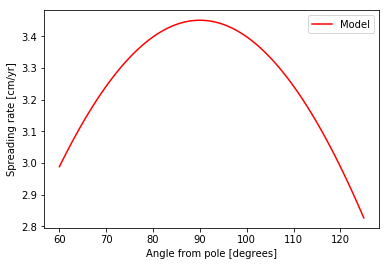

In [14]:
plt.plot(np.rad2deg(theta_P),V_P,'-r',label='Model') #plot model predictions as a red line
plt.xlabel('Angle from pole [degrees]') #label the x-axis
plt.ylabel('Spreading rate [cm/yr]') #label the y-axis
plt.legend() #add a legend to the plot
plt.show() #show the final plot

<hr style="border:none;height:1px;background-color:black;">

### Comparing the model and the observations

To include the observed velocities we calculated in Task 1 into the plot, we need to find the angle between our hypothesized Euler pole ($\lambda_P$,$\psi_P$) and the recorded positions along the mid-ocean ridge ($\lambda_R$,$\psi_R$). Again using our great-circle angle calculation, we can find the angle between the Euler pole and our observed locations along the ridge. We'll call these angles ```theta_PR```:

In [15]:
theta_PR = np.arccos(np.sin(lambda_R)*np.sin(lambda_P)+np.cos(lambda_R)*np.cos(lambda_P)*np.cos(phi_P-phi_R))

We can now make a combined plot that includes our model and the magnetic anomaly-based observations (```V```):

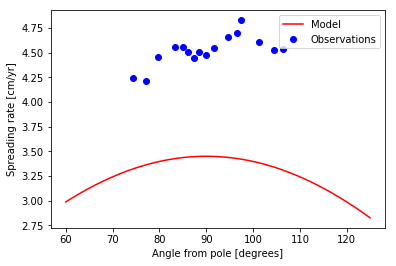

In [16]:
plt.plot(np.rad2deg(theta_P),V_P,'-r',label='Model') #plot model predictions as a red line
plt.plot(np.rad2deg(theta_PR),V,'ob',label='Observations') #plot observations as blue plots
plt.xlabel('Angle from pole [degrees]') #label the x-axis
plt.ylabel('Spreading rate [cm/yr]') #label the y-axis
plt.legend() #add a legend to the plot
plt.show() #show the final plot

<hr style="border:none;height:3px;background-color:black;">

## Task 3: Improving the model-observations agreement

Now that we have the model and the observations on the same plot, we can see that they don't agree very well. While there will be some errors in the observations, the main reason for the large disagreement is the parameters for our Euler pole are incorrect. We selected the parameters $\lambda_P$ and $\psi_P$ and $\omega_P$ based on modern observations, there is no reason to assume that pole is appropriate for 47 million years ago. Referring back to Euler's equation:

$v = \omega R \sin \theta$

we can see how adjustments to our pole parameters can be used to improve the agreement between the model and the data. First let's consider the clear underestimation of spreading rate by the model. In Euler's equation, the velocity will primarily be controlled by $\omega_P$ (this makes sense, as the angular velocity increases, the spreading rate will increase too). Let's increase $\omega_P$ to 4.0 $\times$ 10$^{-7}$ deg yr$^{-1}$, recalculate ```V_P``` and plot the result:

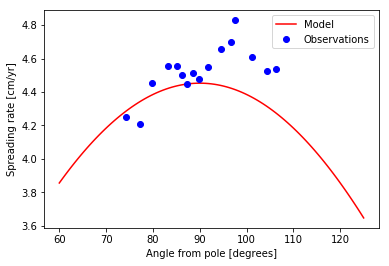

In [17]:
omega_P = np.deg2rad(4.0E-7) #new angular velocity of pole in radians / year
V_P = omega_P*R*np.sin(theta_P) #update the model speeds
plt.plot(np.rad2deg(theta_P),V_P,'-r',label='Model') #plot model predictions as a red line
plt.plot(np.rad2deg(theta_PR),V,'ob',label='Observations') #plot observations as blue plots
plt.xlabel('Angle from pole [degrees]') #label the x-axis
plt.ylabel('Spreading rate [cm/yr]') #label the y-axis
plt.legend() #add a legend to the plot
plt.show() #show the final plot

That's improved the agreement, but there is still clearly room for improvement. The other parameter in Euler's equation we need to consider is $\theta$, which is controlled by the location of the pole. There are two main points to think about:

(1) The model spreading rate will always reach a maximum at $\theta$ = 90$^\circ$ because $\sin(90)$ = 1.

(2) Adjusting $\lambda_P$,$\psi_P$ will change the angle between the Euler pole and the observations.

Therefore if we change the location of the pole we can try to horizontally align the observations and the model spreading rates. This is a little more tricky than improving the agreement in the vertical, but if you play around with the values you can get a reasonable agreement. The best fit I could find was; $\lambda_P$ = 51.8$^\circ$N, $\psi_P$ = 44.0$^\circ$W, and $\omega_P$ = 4.15 $\times$ 10$^{-7}$ deg yr$^{-1}$.

We can use these pole parameters and again plot the results. First we update the pole and the resulting model spreading rates:

In [18]:
lambda_P = np.deg2rad(51.77) #latitude of pole in degrees
phi_P = np.deg2rad(-44.0) #longitude of pole in degrees
omega_P = np.deg2rad(4.15E-7) #angular velocity of pole in degrees / year
V_P = omega_P*R*np.sin(theta_P) #update the model speeds

Of course, changing the pole location also changes the pole-observations angles, which must be updated too:

In [19]:
theta_PR = np.arccos(np.sin(lambda_R)*np.sin(lambda_P)+np.cos(lambda_R)*np.cos(lambda_P)*np.cos(phi_P-phi_R))

Now we can make our final plot:

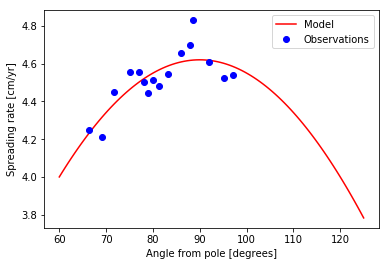

In [20]:
plt.plot(np.rad2deg(theta_P),V_P,'-r',label='Model') #plot model predictions as a red line
plt.plot(np.rad2deg(theta_PR),V,'ob',label='Observations') #plot observations as blue plots
plt.xlabel('Angle from pole [degrees]') #label the x-axis
plt.ylabel('Spreading rate [cm/yr]') #label the y-axis
plt.legend() #add a legend to the plot
plt.show() #show the final plot

We now have a reasonable agreement between the model and the observations. Of course the agreement is not perfect, but that is not surprising given uncertainties in the data and that we are estimating a single pole position to represent average spreading over the last 47 Ma.

<hr style="border:none;height:3px;background-color:black;">

## Conclusion: What does our estimated pole correspond to?

This is a more complicated question than it may appear. We identified locations on the seafloor with the same age using magnetic anomaly 21, which has an age of 47 Ma. However, the distances between the locations on the western and eastern flanks is a function of seafloor spreading that has occurred since 47 Ma. During this time the Euler pole describing the separation of the South-American and Africa plates may have moved and the angular velocity may of changed.

Therefore it is probably best to describe our estimated pole as the "average" Euler pole over the last 47 Ma.